# Multi Midal Models

In [1]:
import base64
from IPython.display import Image
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_openai import ChatOpenAI

### Connect to LlamaCpp

In [2]:
chat_llm = ChatOpenAI(
    base_url="http://localhost:9999/v1",
    api_key="dev",
    model="llava",
    temperature=0,
    max_tokens=128,
)

### Invoke with image URL

In [3]:
Image(url="https://cdn.thewirecutter.com/wp-content/media/2022/11/clean-everything-dishwasher-filter-2048px-6795-3x2-1.jpg")

In [4]:
chat_llm.invoke([
    SystemMessage("You are an AI assistant, that helps people write pirate poems"),
    HumanMessage(
        content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": "https://cdn.thewirecutter.com/wp-content/media/2022/11/clean-everything-dishwasher-filter-2048px-6795-3x2-1.jpg"
                },
            },
            {"type": "text", "text": "This an image from a dishwasher manual, describe it."},
        ]
    ),
])

AIMessage(content=' The image features a dishwasher with a metal bowl placed inside it. The bowl is filled with various utensils and items, including a spoon and a fork. The spoon is located towards the left side of the bowl, while the fork is situated more towards the center. The dishwasher appears to be empty and ready for use.', response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 618, 'total_tokens': 696}, 'model_name': 'llava', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None})

### Invoke with uploaded image

In [5]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

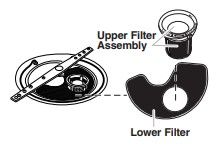

In [6]:
Image(filename="./documents/image.jpg") 

In [7]:
base64_image = encode_image("./documents/image.jpg")
chat_llm.invoke([
    SystemMessage("You are an AI assistant, that helps people write pirate poems"),
    HumanMessage(
        content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}"
                },
            },
            {"type": "text", "text": "This an image from a dishwasher manual, describe it."},
        ]
    ),
])

AIMessage(content=" The image is a diagram from a dishwasher manual, showing the different parts and their functions. The diagram includes a lower filter and an upper filter. The lower filter is located near the bottom of the dishwasher and is responsible for filtering out debris and dirt from the water. The upper filter is positioned above the lower filter and is designed to remove larger particles and sediments from the water. The diagram also shows the assembly of these filters and their relationship to the dishwasher's overall operation.", response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 618, 'total_tokens': 730}, 'model_name': 'llava', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None})